In [1]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

### Goal
1. **Explore user visit patterns** by analyzing PV and UV across different time dimensions.  
2. **Understand user preferences** by analyzing product conversion rates and item categories.  
3. **Investigate user payment behaviors** based on purchase frequency and repeat purchases.

Provide recommendations for product operations


In [2]:
df = pd.read_csv("user_action.csv")
df.head(10)

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21
5,93784494,337869048,1,3979,2014-12-03 20
6,94832743,105749725,1,9559,2014-12-13 20
7,95290487,76866650,1,10875,2014-11-27 16
8,96610296,161166643,1,3064,2014-12-11 23
9,100684618,21751142,3,2158,2014-12-05 23


# Data Cleaning

In [3]:
df.drop_duplicates(['item_id'])

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21
...,...,...,...,...,...
12256715,79359253,262543159,1,13230,2014-11-25 21
12256750,79359253,288807799,1,14079,2014-12-10 19
12256828,79359253,121073107,1,6513,2014-12-10 19
12256839,81933823,162360258,1,5468,2014-11-30 21


### Four behavior types are (1,click)  (2,favorite)  (3,add to cart)  (4,purchase)

In [4]:
print('rows:', len(df))
print('user number:', len(df.drop_duplicates(subset=['user_id'])))
print('item number:', len(df.drop_duplicates(subset=['item_id'])))
print('category number:', len(df.drop_duplicates(subset=['item_category'])))
print('max time:', df['time'].max())
print('min time:', df['time'].min())

rows: 12256906
user number: 10000
item number: 2876947
category number: 8916
max time: 2014-12-18 23
min time: 2014-11-18 00


In [5]:
df.isnull().sum()

user_id          0
item_id          0
behavior_type    0
item_category    0
time             0
dtype: int64

In [6]:
df['date'] = df['time'].apply(lambda x:x.split(' ')[0]) # split the time by the space
df['hour'] = df['time'].apply(lambda x:x.split(' ')[1])
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].apply(lambda x:x.strftime('%A'))
df.head()

,user_id,item_id,behavior_type,item_category,time,date,hour,weekday
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02,Saturday
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20,Tuesday
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11,Thursday
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10,Saturday
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21,Tuesday


In [7]:
df.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
item_category             int64
time                     object
date             datetime64[ns]
hour                     object
weekday                  object
dtype: object

In [8]:
df['user_id'] = df['user_id'].astype('object')
df['item_id'] = df['item_id'].astype('object')
df['item_category'] = df['item_category'].astype('object')
df['hour'] = df['hour'].astype('int64')
df.dtypes

user_id                  object
item_id                  object
behavior_type             int64
item_category            object
time                     object
date             datetime64[ns]
hour                      int64
weekday                  object
dtype: object

In [9]:
df.head(5)

,user_id,item_id,behavior_type,item_category,time,date,hour,weekday
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,2,Saturday
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20,Tuesday
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11,Thursday
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10,Saturday
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21,Tuesday


# Analysis

## 1. Explore users visit patterns

### Daily, hourly, weekly Traffic Analysis

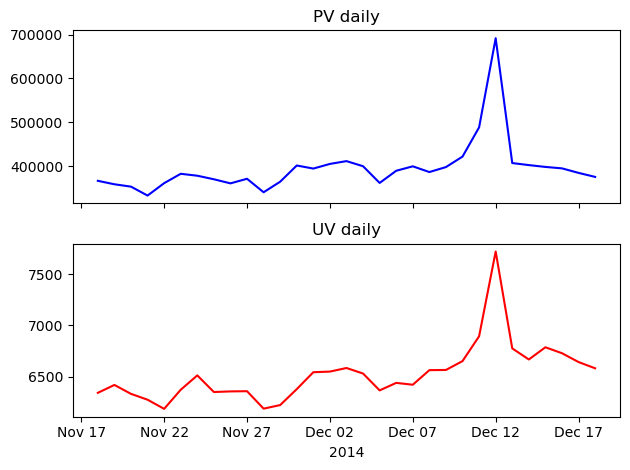

In [10]:
# pv: page views  
# uv: unique visitors
pv_daily = df.groupby(['date'])['user_id'].agg('count').reset_index().rename(columns={'user_id': 'pv_daily'})
uv_daily = df.groupby(['date'])['user_id'].nunique().reset_index().rename(columns={'user_id': 'uv_daily'})

pv_uv_daily = pd.merge(pv_daily, uv_daily, on='date', how='inner') # combine daily pv,uv


fig,axes = plt.subplots(2, 1, sharex=True)

axes[0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

axes[0].plot(pv_daily['date'], pv_daily['pv_daily'], color='blue')
axes[0].set_title('PV daily')

axes[1].plot(uv_daily['date'], uv_daily['uv_daily'], color='red')
axes[1].set_title('UV daily')
axes[1].set_xlabel('2014')

plt.tight_layout()
plt.show()

#### There is a peek in the PV and UV daily on Dec 12, which is because of an annual marketing campaign in China on Dec 12.

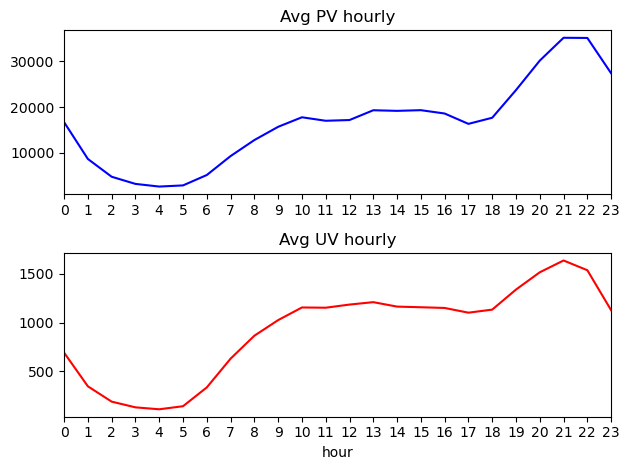

In [11]:
# pv: page views  
# uv: unique visitors
pv_hourly_sum = df.groupby(['date', 'hour'])['user_id'].count().reset_index(name='pv_hourly')
uv_hourly_sum = df.groupby(['date', 'hour'])['user_id'].nunique().reset_index(name='uv_hourly')

pv_hourly = pv_hourly_sum.groupby('hour')['pv_hourly'].mean().reset_index(name='avg_pv_hourly')
uv_hourly = uv_hourly_sum.groupby('hour')['uv_hourly'].mean().reset_index(name='avg_uv_hourly')

pv_uv_hour = pd.merge(pv_hourly, uv_hourly, on='hour', how='inner')

# plot
fig,axes = plt.subplots(2, 1)

axes[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[0].set_xlim(0, 23)

axes[0].plot(pv_hourly['hour'], pv_hourly['avg_pv_hourly'], color='blue')
axes[0].set_title('Avg PV hourly')

axes[1].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[1].set_xlim(0, 23)

axes[1].plot(uv_hourly['hour'], uv_hourly['avg_uv_hourly'], color='red')
axes[1].set_title('Avg UV hourly')
axes[1].set_xlabel('hour')

plt.tight_layout()
plt.show()

#### Unique visitors and page views follow a similar daily pattern. Both reach their lowest level around 04:00, rise steadily until 10:00, remain relatively stable until about 18:00, and then peak between 20:00 and 23:00. This suggests higher user activity in the evening, likely because most users have finished work and have more time to browse.

In [12]:
df.head(2)

,user_id,item_id,behavior_type,item_category,time,date,hour,weekday
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,2,Saturday
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20,Tuesday


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28752\1888963327.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pv_weekday = pv_daily.groupby('weekday')['pv'].agg(['count','mean','sum']).reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28752\1888963327.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uv_weekday = uv_daily.groupby('weekday')['uv'].agg(['count','mean','sum']).reset_index()


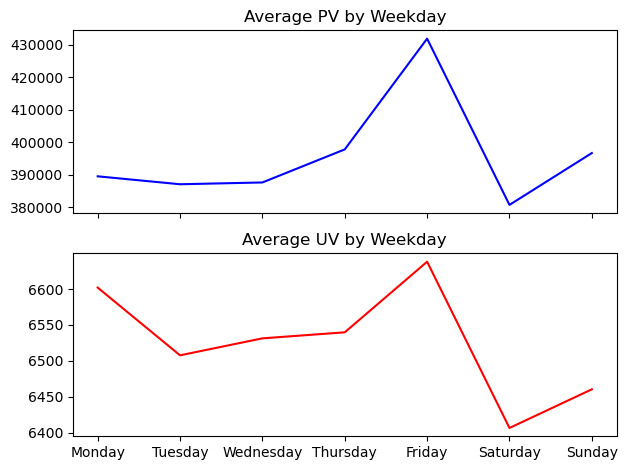

In [13]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

pv_daily = (
    df.groupby(['date'])['user_id']
      .count()
      .reset_index(name='pv')
)
pv_daily['weekday'] = pv_daily['date'].apply(lambda x:x.strftime('%A'))
pv_daily['weekday'] = pd.Categorical(pv_daily['weekday'],categories=weekday_order,ordered=True)
pv_weekday = pv_daily.groupby('weekday')['pv'].agg(['count','mean','sum']).reset_index()


uv_daily = (
    df.groupby(['date'])['user_id']
      .nunique()
      .reset_index(name='uv')
)
uv_daily['weekday'] = uv_daily['date'].apply(lambda x:x.strftime('%A'))
uv_daily['weekday'] = pd.Categorical(uv_daily['weekday'],categories=weekday_order,ordered=True)
uv_weekday = uv_daily.groupby('weekday')['uv'].agg(['count','mean','sum']).reset_index()


# Plot
fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(pv_weekday['weekday'], pv_weekday['mean'], color='blue')
axes[0].set_title('Average PV by Weekday')

axes[1].plot(uv_weekday['weekday'], uv_weekday['mean'], color='red')
axes[1].set_title('Average UV by Weekday')

plt.tight_layout()
plt.show()

#### PV stays steady from Monday to Wednesday, rises to a peak on Friday, drops sharply on Saturday, then recovers slightly on Sunday. UV is high on Monday, dips from Tuesday to Thursday, peaks on Friday, drops sharply on Saturday, then recovers slightly on Sunday.

In [14]:
df.head()

,user_id,item_id,behavior_type,item_category,time,date,hour,weekday
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,2,Saturday
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20,Tuesday
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11,Thursday
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10,Saturday
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21,Tuesday


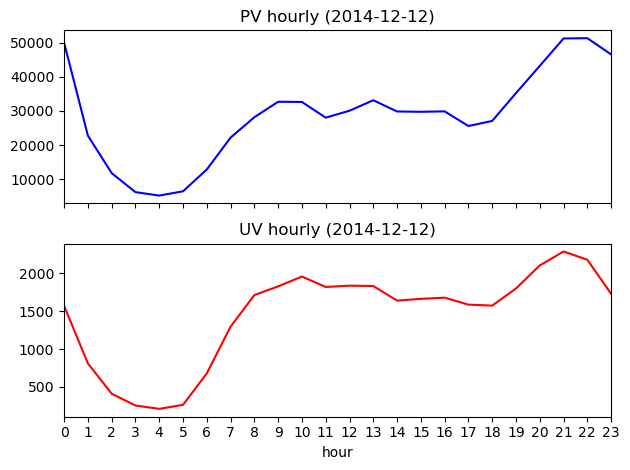

In [15]:
df_1212 = df[df['date']=='2014-12-12']
# pv: page views  
# uv: unique visitors
pv_hourly_12 = df_1212.groupby(['hour'])['user_id'].agg('count').reset_index().rename(columns={'user_id': 'pv_hourly'})
uv_hourly_12 = df_1212.groupby(['hour'])['user_id'].nunique().reset_index().rename(columns={'user_id': 'uv_hourly'})

pv_uv_hour_12 = pd.merge(pv_hourly, uv_hourly, on='hour', how='inner')

fig,axes = plt.subplots(2, 1, sharex=True)

axes[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[0].set_xlim(0, 23)

axes[0].plot(pv_hourly_12['hour'], pv_hourly_12['pv_hourly'], color='blue')
axes[0].set_title('PV hourly (2014-12-12)')

axes[1].plot(uv_hourly_12['hour'], uv_hourly_12['uv_hourly'], color='red')
axes[1].set_title('UV hourly (2014-12-12)')
axes[1].set_xlabel('hour')

plt.tight_layout()
plt.show()

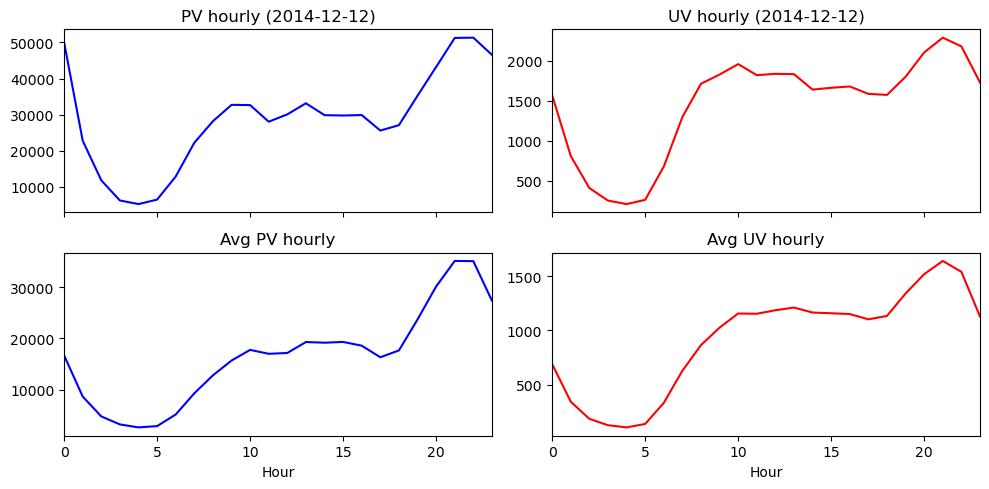

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True)

# Top-left: PV hourly for 2014-12-12
axes[0, 0].plot(pv_hourly_12['hour'], pv_hourly_12['pv_hourly'], color='blue')
axes[0, 0].set_title('PV hourly (2014-12-12)')
axes[0, 0].set_xlim(0, 23)

# Top-right: UV hourly for 2014-12-12
axes[0, 1].plot(uv_hourly_12['hour'], uv_hourly_12['uv_hourly'], color='red')
axes[0, 1].set_title('UV hourly (2014-12-12)')
axes[0, 1].set_xlim(0, 23)

# Bottom-left: Avg PV hourly across all dates
axes[1, 0].plot(pv_hourly['hour'], pv_hourly['avg_pv_hourly'], color='blue')
axes[1, 0].set_title('Avg PV hourly')
axes[1, 0].set_xlim(0, 23)
axes[1, 0].set_xlabel('Hour')

# Bottom-right: Avg UV hourly across all dates
axes[1, 1].plot(uv_hourly['hour'], uv_hourly['avg_uv_hourly'], color='red')
axes[1, 1].set_title('Avg UV hourly')
axes[1, 1].set_xlim(0, 23)
axes[1, 1].set_xlabel('Hour')

plt.tight_layout()
plt.show()

#### Since December 12 is a special campaign day, the hourly PV and UV exhibit a slightly different pattern. Hourly PV is about 10,000 and UV about 500 above average. Apart from the same peaking at 20:00-23:00, both metrics spike significantly at 0:00, indicating that people begin preparing for the annual campaign right at midnight.

In [17]:
df.head()

,user_id,item_id,behavior_type,item_category,time,date,hour,weekday
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,2,Saturday
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20,Tuesday
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11,Thursday
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10,Saturday
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21,Tuesday


### Different Customers Behavior Types Traffic Analysis

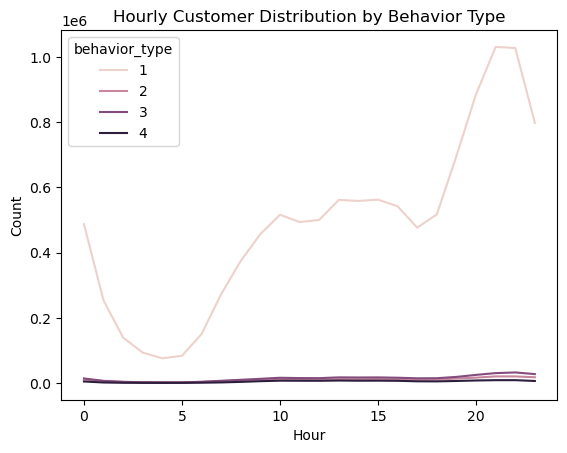

In [18]:
df_behavior = df.groupby(['behavior_type','hour'])[['user_id']].count().reset_index().rename(columns={'user_id': 'customer_number'})

sns.lineplot(data=df_behavior, x='hour', y='customer_number', hue='behavior_type')

plt.title("Hourly Customer Distribution by Behavior Type")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

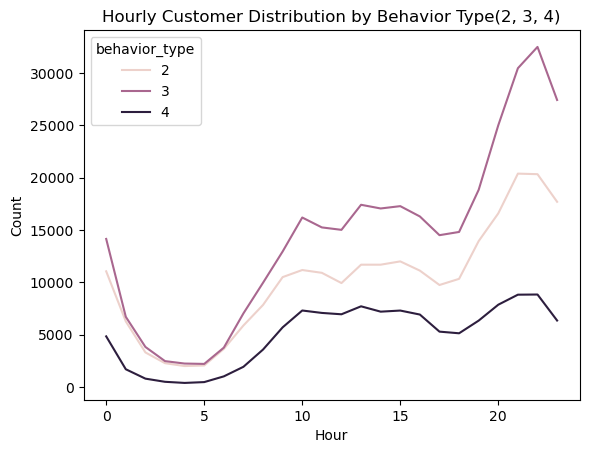

In [19]:
sns.lineplot(data=df_behavior[df_behavior['behavior_type'].isin([2, 3, 4])], x='hour', y='customer_number', hue='behavior_type')

plt.title("Hourly Customer Distribution by Behavior Type(2, 3, 4)")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

#### Most customers belong to behavior type 1, but all four behavior types exhibit a similar pattern: activity starts around 19:00, peaks at approximately 23:00, and then gradually declines to its lowest point around 5:00.

### Conclusion: 
1. Users are more active from 20:00 to 23:00. 
2. Friday has the highest PV and UV among the week. PV and UV are high at 0:00 on Dec 12. 
3. Most people just click the page without other behaviors.

### Suggestions: 
1. Concentrate promotions during peak hours (20:00–23:00) 
2. Prioritize Fridays for major campaigns
3. Improve click-to-action conversion like clearer “Add to Cart” buttons, limited-time offers, or personalized recommendations.

## 2. Understand user preferences

### Conversion rate

In [20]:
behavior_type = df.groupby(['behavior_type'])['user_id'].count()
behavior_type

behavior_type
1    11550581
2      242556
3      343564
4      120205
Name: user_id, dtype: int64

In [21]:
click_num, fav_num, cart_num, pay_num = behavior_type[1],behavior_type[2],behavior_type[3],behavior_type[4]

fav_cart_num = fav_num + cart_num

print(f'Conversion Rate (Click → Fav+Cart): {round(fav_cart_num / click_num * 100, 2)}%')
print(f'Conversion Rate (Fav+Cart → Purchase): {round(pay_num / fav_cart_num * 100, 2)}%')
print(f'Overall Conversion Rate (Click → Purchase): {round(pay_num / click_num * 100, 2)}%')

Conversion Rate (Click → Fav+Cart): 5.07%
Conversion Rate (Fav+Cart → Purchase): 20.51%
Overall Conversion Rate (Click → Purchase): 1.04%


### Conversion rate of Dec 12 Campaign

In [22]:
behavior_type = df_1212.groupby(['behavior_type'])['user_id'].count()

click_num, fav_num, cart_num, pay_num = behavior_type[1],behavior_type[2],behavior_type[3],behavior_type[4]

fav_cart_num = fav_num + cart_num

print(f'Dec.12 Conversion Rate (Click → Fav+Cart): {round(fav_cart_num / click_num * 100, 2)}%')
print(f'Dec.12 Conversion Rate (Fav+Cart → Purchase): {round(pay_num / fav_cart_num * 100, 2)}%')
print(f'Dec.12 Overall Conversion Rate (Click → Purchase): {round(pay_num / click_num * 100, 2)}%')

Dec.12 Conversion Rate (Click → Fav+Cart): 5.45%
Dec.12 Conversion Rate (Fav+Cart → Purchase): 43.63%
Dec.12 Overall Conversion Rate (Click → Purchase): 2.38%


#### Customer are actually likely to purchase if they favorite or add it to cart (20%), the problem is how to recommend the right product to them (5%). The 12.12 campaign effectively doubles the conversion rate from fav/cart to purchase, resulting in a doubled overall conversion rate.

### Items Categories Analysis

In [23]:
df.head()

,user_id,item_id,behavior_type,item_category,time,date,hour,weekday
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,2,Saturday
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20,Tuesday
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11,Thursday
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10,Saturday
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21,Tuesday


In [24]:
pv = df.groupby('item_category')['behavior_type'].count().reset_index(name='pv')

fav = df[df['behavior_type'] == 2].groupby('item_category')['behavior_type'].count().reset_index(name='fav')

cart = df[df['behavior_type'] == 3].groupby('item_category')['behavior_type'].count().reset_index(name='cart')

buy = df[df['behavior_type'] == 4].groupby('item_category')['behavior_type'].count().reset_index(name='buy')

df_behavior = pv.merge(cart, on='item_category', how='left').merge(fav, on='item_category', how='left').merge(buy, on='item_category', how='left')

df_behavior[['cart', 'fav', 'buy']] = df_behavior[['cart','fav', 'buy']].fillna(0).astype(int)

df_behavior['conversion_rate_favcart'] = (df_behavior['fav'] + df_behavior['cart'])/ df_behavior['pv'] * 100

df_behavior['conversion_rate'] = df_behavior['buy'] / df_behavior['pv'] * 100

df_behavior = df_behavior[df_behavior['fav']<=df_behavior['pv']]
df_behavior = df_behavior[df_behavior['cart']<=df_behavior['pv']]
df_behavior = df_behavior[df_behavior['buy']<=df_behavior['pv']]

df_behavior


,item_category,pv,cart,fav,buy,conversion_rate_favcart,conversion_rate
0,2,3,0,0,0,0.000000,0.000000
1,3,3,0,0,0,0.000000,0.000000
2,4,1,0,0,0,0.000000,0.000000
3,6,10,0,0,0,0.000000,0.000000
4,8,993,4,9,4,1.309164,0.402820
...,...,...,...,...,...,...,...
8911,14075,48,3,0,1,6.250000,2.083333
8912,14076,29,1,0,0,3.448276,0.000000
8913,14078,60,0,0,0,0.000000,0.000000
8914,14079,98190,2515,2189,479,4.790712,0.487830


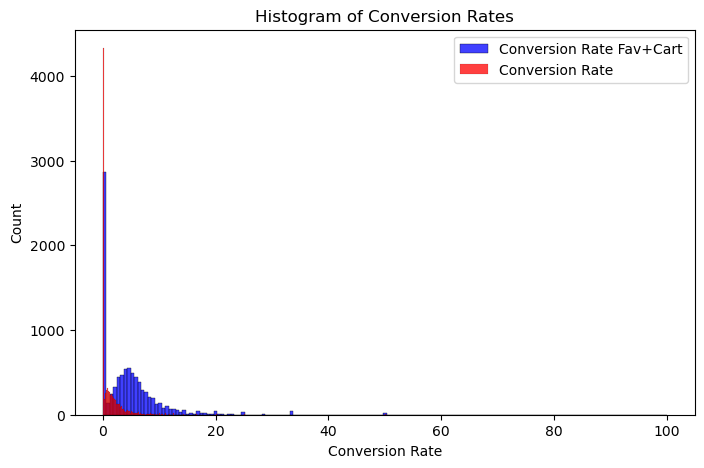

In [25]:
plt.figure(figsize=(8, 5))

# Plot first histogram
sns.histplot(df_behavior['conversion_rate_favcart'], color='blue', label='Conversion Rate Fav+Cart', kde=False)

# Plot second histogram
sns.histplot(df_behavior['conversion_rate'], color='red', label='Conversion Rate', kde=False)

plt.legend()
plt.xlabel('Conversion Rate')
plt.ylabel('Count')
plt.title('Histogram of Conversion Rates')
plt.show()

In [26]:
# Not purchasing rate
no_purchase_rate = df_behavior[df_behavior['buy']==0]['item_category'].count()/df_behavior['item_category'].count()

# Not interested rate
no_interest_rate = df_behavior[(df_behavior['fav']+df_behavior['cart'])==0]['item_category'].count()/df_behavior['item_category'].count()

print(f'Percentage of items with no purchases: {no_purchase_rate:.2%}')
print(f'Percentage of items with no user interest: {no_interest_rate:.2%}')

Percentage of items with no purchases: 47.68%
Percentage of items with no user interest: 31.71%


#### Most items overall conversion rate and interest rate are below 10%. Over 47% items haven't been purchased and over 31% items were not interested.

In [27]:
pv20 = df_behavior.nlargest(20,'pv')
buy20 = df_behavior.nlargest(20,'buy')

categories = set(pv20.index).intersection(set(buy20.index))
categories

{1136,
 1911,
 2744,
 3148,
 3284,
 3394,
 3708,
 3985,
 4094,
 5976,
 6532,
 6844,
 7098,
 8371}

#### These items rank highest in both views and purchases. Analyzing the factors behind their appeal can guide the introduction of more similar, high-potential products.

This conversion rate is not used in the analysis because, for some items, the number of purchases is too low to accurately reflect the top-performing items.

### Conclusion: 
1. Conversion Rate (Click → Fav+Cart): 5.07%.
Conversion Rate (Fav+Cart → Purchase): 20.51%.
Overall Conversion Rate (Click → Purchase): 1.04%.
2. Customer are actually likely to purchase if they favorite or add it to cart (20%), the problem is how to recommend the right product to them (5%). The 12.12 campaign effectively doubles the conversion rate from fav/cart to purchase, resulting in a doubled overall conversion rate.
3. Most items overall conversion rate and interest rate are below 10%. Over 47% items haven't been purchased and over 31% items were not interested.

### Suggestion:
1. Improve product recommendations to increase click → Fav/cart rates.
2. Use targeted reminders and incentives for users who favorited or added items to cart.
3. Analyzing the factors behind the highest ranked items to introduce more similar, high-potential products. And reconsider low-interest, no-purchase items.
4. Replicate and optimize successful strategies from the 12.12 campaign for future sales.

## 4. Customer Value Analysis

### Customer Purchase Frequency

In [142]:
df_purchase = df[df['behavior_type']==4].groupby('user_id')['behavior_type'].count().reset_index(name='count')
df_purchase

,user_id,count
0,4913,6
1,6118,1
2,7528,6
3,7591,21
4,12645,8
...,...,...
8881,142376113,1
8882,142412247,12
8883,142430177,5
8884,142450275,40


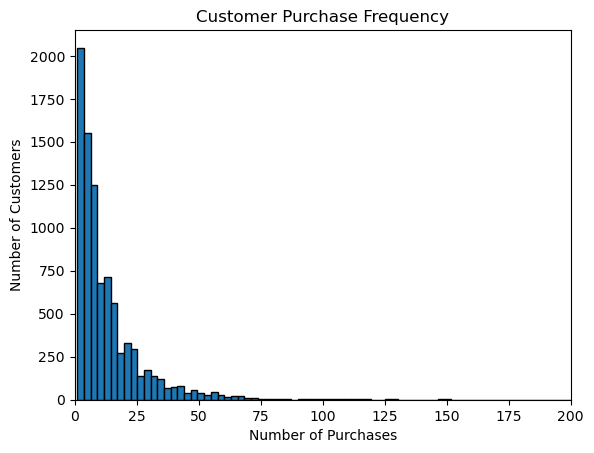

In [150]:
plt.hist(df_purchase['count'], bins=300, edgecolor='black')  # bins can be adjusted
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.xlim(0, 200)
plt.show()

The majority of customers have a low purchase frequency, with the highest number of users clustered near zero purchases. As purchase frequency increases, the number of customers decreases steadily, and by a frequency of 50 purchases, nearly all users are included.

### Repurchase Rate

In [46]:
user_pay = df[df['behavior_type']==4].groupby('user_id')['date'].nunique().reset_index(name='count')
user_pay

,user_id,count
0,4913,5
1,6118,1
2,7528,6
3,7591,9
4,12645,4
...,...,...
8881,142376113,1
8882,142412247,7
8883,142430177,5
8884,142450275,8


#### Repurchase rate = users purchased more than once / all purchased users

In [49]:
repurchase_rate = user_pay[user_pay['count']>1]['count'].count()/user_pay['count'].count()
repurchase_rate

0.8717083051991897

#### More than 87% of all the purchased users would purchase again. 

### Repurchase time

Ignore multiple purchase on same date, sort by user id and date

In [121]:
user_buy_date = df[df['behavior_type']==4].sort_values(['user_id', 'date']).drop_duplicates(['user_id','date']).reset_index(drop=True)
user_buy_date

,user_id,item_id,behavior_type,item_category,time,date,hour,weekday
0,4913,343170253,4,13381,2014-12-01 23,2014-12-01,23,Monday
1,4913,44957435,4,9127,2014-12-07 22,2014-12-07,22,Sunday
2,4913,172639700,4,13381,2014-12-11 18,2014-12-11,18,Thursday
3,4913,92674121,4,11981,2014-12-13 18,2014-12-13,18,Saturday
4,4913,361346418,4,5065,2014-12-16 12,2014-12-16,12,Tuesday
...,...,...,...,...,...,...,...,...
49196,142455899,392926185,4,9559,2014-11-24 21,2014-11-24,21,Monday
49197,142455899,30234709,4,10875,2014-11-26 10,2014-11-26,10,Wednesday
49198,142455899,206946411,4,12321,2014-11-30 14,2014-11-30,14,Sunday
49199,142455899,196233827,4,5027,2014-12-03 10,2014-12-03,10,Wednesday


calculate the date difference

In [122]:
user_buy_date['date_diff'] = user_buy_date.groupby('user_id')['date'].diff().dt.days

user_buy_date = user_buy_date.dropna(subset=['date_diff'])

user_buy_date = user_buy_date.loc[:, ['user_id', 'date_diff']]

user_buy_date

,user_id,date_diff
1,4913,6.0
2,4913,4.0
3,4913,2.0
4,4913,3.0
7,7528,4.0
...,...,...
49196,142455899,2.0
49197,142455899,2.0
49198,142455899,4.0
49199,142455899,3.0


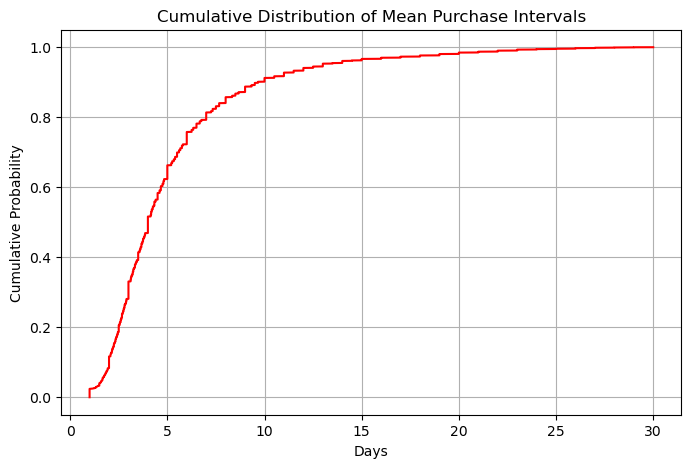

In [145]:
sorted_intervals = np.sort(mean_date_diff_per_user)

# Calculate cumulative probabilities
cum_probs = np.arange(1, len(sorted_intervals) + 1) / len(sorted_intervals)

plt.figure(figsize=(8, 5))
plt.plot(sorted_intervals, cum_probs, linestyle='-', color='red')
plt.xlabel('Days')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Mean Purchase Intervals')
plt.grid(True)
plt.show()


### Over 95% repurchase occur within the first 15 days, and 90% happen within just 10 days. This indicates a critical window shortly after purchase where customer engagement efforts are most effective.

### Conclusion:
1. The majority of customers have a low purchase frequency, with the highest number of users clustered near zero purchases.
2. More than 87% of all the purchased users would purchase again. 
3. Over 95% repurchase occur within the first 15 days, and 90% happen within just 10 days.

### Suggestions:
1. Focus marketing efforts on encouraging first-time buyers to make a second purchase within the first 15 days.

2. Implement timely post-purchase engagement like reminders, offers within the critical 10-15 day window.

3. Develop loyalty programs targeting repeat customers to increase purchase frequency.

4. Analyze barriers preventing low-frequency buyers from repurchasing and address them.